# Main Notebook for JS 2024

## 1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc


#### Viewing part of the training dataset

In [2]:
train_data_path="/Users/mic/Desktop/Github/js_market_forecast/jane-street-real-time-market-data-forecasting/train.parquet"
# if on kaggle notebook use the file path /kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet
train_data_0_path=f"{train_data_path}/partition_id=0/part-0.parquet" #looking into the first dataset
part_0_data=pd.read_parquet(train_data_0_path)
part_0_data.head() 

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,0,0,1,3.889038,NaN,NaN,NaN,NaN,NaN,0.851033,...,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
1,0,0,7,1.370613,NaN,NaN,NaN,NaN,NaN,0.676961,...,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.000000,0.703665,0.216683,0.778639
2,0,0,9,2.285698,NaN,NaN,NaN,NaN,NaN,1.056285,...,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
3,0,0,10,0.690606,NaN,NaN,NaN,NaN,NaN,1.139366,...,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
4,0,0,14,0.440570,NaN,NaN,NaN,NaN,NaN,0.955200,...,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.000000,-3.572820,-1.089123,-5.000000


In [3]:
part_0_data.columns

Index(['date_id', 'time_id', 'symbol_id', 'weight', 'feature_00', 'feature_01',
       'feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06',
       'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46',
       'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51',
       'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56',
       'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_6

In [4]:
len(part_0_data.columns)

92

Notice that above there are several NaN values in the dataset, let's take a deeper look into that which might in the future impact our analysis

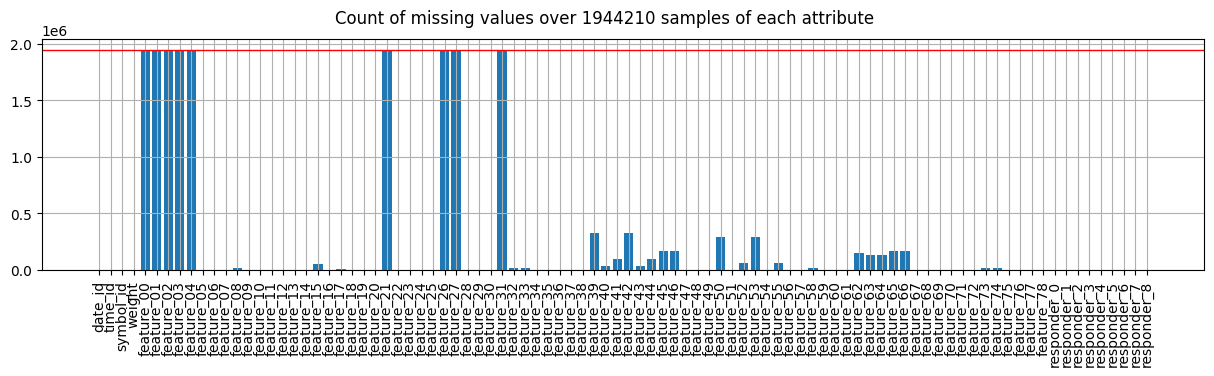

In [5]:
NaN_value_count_part_0=part_0_data.isna().sum(axis=0) # counts the NA values of each column

plt.figure(figsize=(15,3))
plt.bar(x=part_0_data.columns, height=NaN_value_count_part_0)
plt.suptitle(f"Count of missing values over {part_0_data.shape[0]} samples of each attribute")
plt.axhline(y=part_0_data.shape[0], color="red", linewidth=1) # a line that indicates all values are missing
plt.xticks(rotation=90)
plt.grid()
plt.show()

Notice that there are **several features that are entirely missing in this part of the dataset**. We would need to pay attention to this later when using a larger portion of the dataset. 

In [6]:
del part_0_data #delete the data because it takes up relatively large amount of space
gc.collect()

17660

### Taking a closer look to the csv files of feature and responder

#### features.csv

In [7]:
original_feature_path="/Users/mic/Desktop/Github/js_market_forecast/jane-street-real-time-market-data-forecasting/features.csv"
features=pd.read_csv(original_feature_path)
features.head()

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16
0,feature_00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,feature_01,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,feature_02,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,feature_03,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,feature_04,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True


A immediate approach would be to find out which features are more correlated to each other by using a **correlation heat map**. 

In [8]:
feature_correlation_matrix=features[[f"tag_{num}" for num in range(0,17)]].T.corr() # computing the correlation matrix

The correlation heat map of features

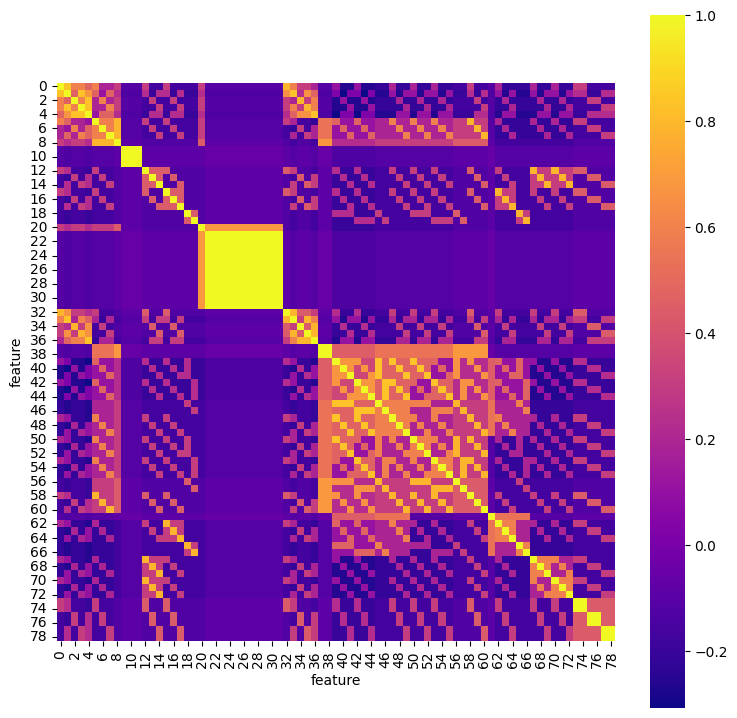

In [9]:
plt.figure(figsize=(9, 9))
sns.heatmap(feature_correlation_matrix, square=True, cmap="plasma")
plt.xlabel("feature")
plt.ylabel("feature")
plt.show()

Seems that most of the features are not very correlated. Interestingly, features 21-31 are highly correlated. Let's take a look

In [10]:
feature_correlation_matrix.iloc[21:32, 21:32]

,21,22,23,24,25,26,27,28,29,30,31
21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
28,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
29,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
30,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


The values are indeed all 1, indicating they have a perfect positive linear correlation. **Technically, we then don't have to consider all of these: one would be enough?**

#### responders.csv

Let's do a similar analysis for the responders file

In [11]:
original_responder_path="/Users/mic/Desktop/Github/js_market_forecast/jane-street-real-time-market-data-forecasting/responders.csv"
responders=pd.read_csv(original_responder_path)
responders.head()

,responder,tag_0,tag_1,tag_2,tag_3,tag_4
0,responder_0,True,False,True,False,False
1,responder_1,True,False,False,True,False
2,responder_2,True,True,False,False,False
3,responder_3,False,False,True,False,True
4,responder_4,False,False,False,True,True


In [12]:
responder_correlation_matrix=responders[[ f"tag_{num}" for num in range(0,5)]].T.corr()

similarily, the correlation heatmap of responders

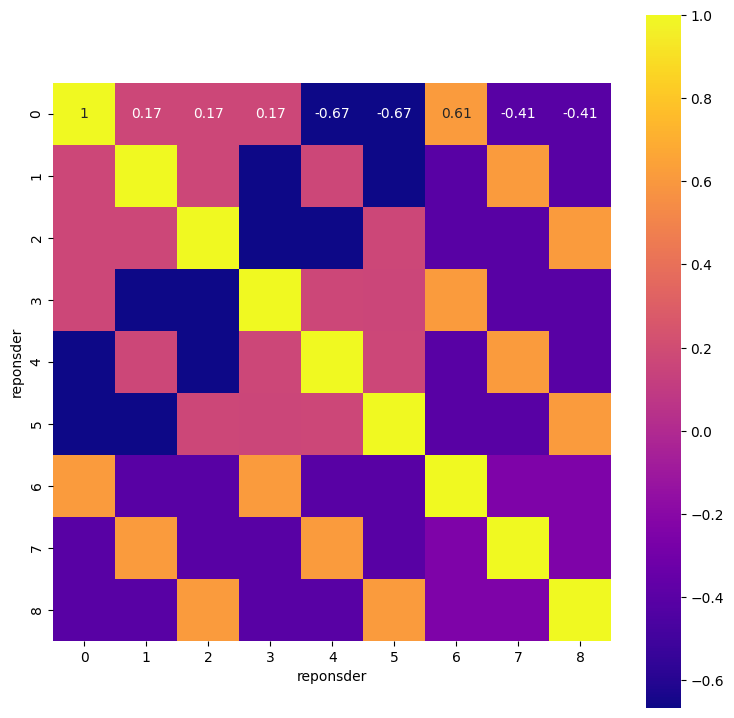

In [13]:
plt.figure(figsize=(9, 9))
sns.heatmap(responder_correlation_matrix, annot=True,  square=True, cmap="plasma") # since it's fairly small, we can check the individual values directly on the figure
plt.xlabel("reponsder")
plt.ylabel("reponsder")
plt.show()

Sadly this doesn't tell us much 

#### sample_submission.csv

quickly check what the submission looks like

In [14]:
sample_submission_path="/Users/mic/Desktop/Github/js_market_forecast/jane-street-real-time-market-data-forecasting/sample_submission.csv"
sample_submission=pd.read_csv(sample_submission_path)
sample_submission

,row_id,responder_6
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


In [15]:
gc.collect()

7038

## 2. Trying to build a model

#### Extracting data

We can now use a larger portion of the dataset. However, after trying, if we use all the data provided, it fills all storage easily and further work would pass the time constraint as well. After trying out, useing 3 partitions given is the best choice for local work environment. 

In [16]:
all_data=[] # a list that takes 3 elements: 3 dataframnes converted from .parquet file 
weights=[] # extract out the weights for further usage

first_half_train_data_path="/Users/mic/Desktop/Github/js_market_forecast/jane-street-real-time-market-data-forecasting/train.parquet" # first half of the data path
# if on kaggle notebook use the file path /kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet
for i in range (7,10):
    train_data_i_path=f"{first_half_train_data_path}/partition_id={i}/part-0.parquet"
    part_i_data=pd.read_parquet(train_data_i_path)
    
    part_i_weights=part_i_data["weight"].values.tolist() # extract the weight column and make it a list
    weights.extend(part_i_weights) 
    
    part_i_data.drop("weight", axis=1, inplace=True) # set inplace to True to avoid extra memory cost
    all_data.append(part_i_data) # get each dataframe as elements of an array

train=pd.concat(all_data, axis=0) # then concatenate to get the large dataframe

#clean up space
del part_i_data
del part_i_weights
del all_data
gc.collect()

print(f"train shape: {train.shape}, weights.shape: {len(weights)}")
    


train shape: (18750160, 91), weights.shape: 18750160


Let's see if this larger dataset also have a lot of missing values.

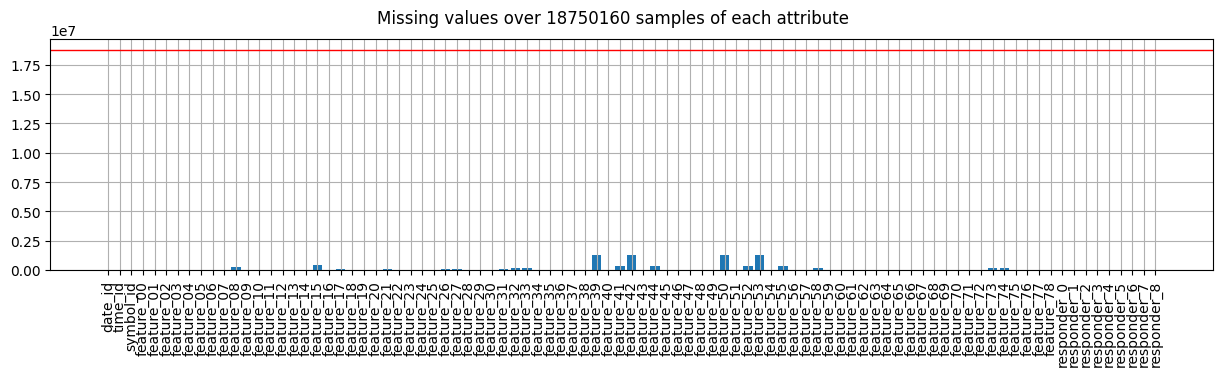

In [17]:
NaN_value_count=train.isna().sum()

plt.figure(figsize=(15,3))
plt.bar(x=train.columns, height=NaN_value_count)
plt.suptitle(f"Missing values over {train.shape[0]} samples of each attribute")
plt.axhline(y=train.shape[0], color="red", linewidth=1)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Looks like it's not bad. There are a few missing value, but not a lot. We can fill these values for later analysis. 

In [19]:
feature_needed=[] # grab all features, getting rid of data_id, time_id, symbol_id, and other responders 
for i in range (0, 79):
    if i<10:
        feature_needed.append(f"feature_0{i}")
    else:
        feature_needed.append(f"feature_{i}")
X=train[feature_needed].fillna(value=-1).values #fill up a random value, 3 is somehow giving better results
y=train["responder_6"].values

#clean up space
del train
gc.collect()

#checking dimensions
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (18750160, 79), y shape: (18750160,)


#### Evaluation metric

write the evaluation metric so we can see if we are improving locally

In [20]:
def JS_metric(y_true, y_pred, weights):
    R_squared_score=1-np.sum(weights*(y_true-y_pred)**2)/np.sum(weights*y_true**2)
    return R_squared_score

### Ridge Regression

Since it's a regression task, the intuitive thought is to use Ridge regression

In [21]:
from sklearn.linear_model import Ridge

model_ridge1=Ridge()
model_ridge1.fit(X, y)
y_pred_ridge1=model_ridge1.predict(X)
print(f"R^2 metric evaluated on training set is {JS_metric(y, y_pred_ridge1, weights)}")

R^2 metric evaluated on training set is 0.006807776670830434


In [22]:
model_ridge2=Ridge()
model_ridge2.fit(X, y, weights)
y_pred_ridge2=model_ridge2.predict(X)
print(f"R^2 metric evaluated on training set is {JS_metric(y, y_pred_ridge2, weights)}")

R^2 metric evaluated on training set is 0.006932456192105363


From above we can see using the weights when fitting the regression model did not help much, but either provides a not bad result

In [27]:
mask=np.ones(X.shape[1], dtype=bool)
mask[22:32]=False
X_less_features=X[:, mask]

In [29]:
model_ridge3=Ridge()
model_ridge3.fit(X_less_features, y)
y_pred_ridge3=model_ridge3.predict(X_less_features)
print(f"R^2 metric evaluated on training set is {JS_metric(y, y_pred_ridge3, weights)}")

R^2 metric evaluated on training set is 0.006515068490008269


apparently getting rid of the features that are totally linear with others doesn't help with the results

In [30]:
del X_less_features
gc.collect()

61

### XGB Regression

Attempting to have a better result, let's try XGB, since it has been known to be powerful for kaggle

In [31]:
train_size = int(len(X) * 0.8)

#For XGB models, it's good to seperate train and validation set which could be helpful when constructing the model
X_train = X[:train_size]
X_val = X[train_size:]
y_train = y[:train_size]
y_val = y[train_size:]
weights_train = weights[:train_size]
weights_val = weights[train_size:]


In [32]:
# shrinks learning rate
def learning_rate_scheduler_xgb(epoch):
    initial_rate = 0.3
    decay_rate = 0.999
    return initial_rate * (decay_rate ** (np.log(epoch)))


In [33]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(
    n_estimators=5000,
    learning_rate=learning_rate_scheduler_xgb,
    tree_method='hist', # "hist" method is faster and more memory-efficient for large datasets
    max_depth=6,
    random_state=14,
    eval_metric='rmse',
    early_stopping_rounds=10 # stop if not improving for 10 consecutive rounds on validation set
)
# Fit the model with sample weights and validation dataset
model_xgb.fit(
    X_train,
    y_train,
    sample_weight=weights_train, #assign weights for training samples
    eval_set=[(X_val, y_val)],
    sample_weight_eval_set=[weights_val], #assign weights for samples in validation set
    verbose=False
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None,
             learning_rate=<function learning_rate_scheduler_xgb at 0x3f1ead480>,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=14, ...)

In [34]:
xgb_y_pred=model_xgb.predict(X)
print(f"R^2 metric evaluated on training set is {JS_metric(y, xgb_y_pred, weights)}")

R^2 metric evaluated on training set is 0.01540961329949142


From the results here, we can see XGB is producing a better result (at least from this partial dataset)

### Neural Network

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning 

In [31]:
class NN(pytorch_lightning.LightningModule):
    def __init__(self, input_dim, hidden_dims, lr):
        super().__init__()
        self.save_hyperparameters()
        
        nn_layers=[]
        in_dim=input_dim
        for hidden_dim in hidden_dims:
            Normalization_layer=nn.BatchNorm1d(in_dim)
            nn_layers.append(nn.ReLU())
            nn_layers.append(nn.Linear(in_dim, hidden_dim))
            in_dim=hidden_dim
        
        nn_layers.append(nn.Linear(in_dim, 1))
        nn_layers.append(nn.Tanh())
        
        self.model=nn.Sequential(*nn_layers)
        self.learning_rate=lr

    def forward(self, x):
        return 5*self.model(x).squeeze(-1) # make the value ends up in -5 to 5
    
    def training_step(self, batch):
        X,y,w=batch
        y_pred=self(x)
        loss=F.mse_loss(y_pred, y, reduction="none")*w
        loss=loss.mean()
        self.log("train_loss", loss, on_epoch=True, on_step=False, batch_size=x.size(0))
        return loss
    
    def configure_optimizers(self):
        optimizer=torch.optim.Adam(self.parameters(), lr=self.learning_rate)
    

This is only an attempt (using lightningModule for fun since before I only uses the standard nn.Module), since later read a blog sharing a standard neural network would run out of time for this competition. 

## Submitting the predictions

This step need to be done in kaggle website, but here's the code used

In [ ]:
import os
import polars as pl
import kaggle_evaluation.jane_street_inference_server

In [ ]:
def predict(test: pl.DataFrame, lags: pl.DataFrame | None) -> pl.DataFrame | pd.DataFrame:
    predictions = test.select(
        'row_id',
        pl.lit(0.0).alias('responder_6'),
    )
    test=test.to_pandas()[feature_needed].fillna(-1) # as usual filling with -1
    test_preds=model_ridge1.predict(test.values)
    predictions = predictions.with_columns(pl.Series('responder_6', test_preds.ravel()))
    return predictions

In [ ]:
def predict(test: pl.DataFrame, lags: pl.DataFrame | None) -> pl.DataFrame | pd.DataFrame:
    predictions = test.select(
        'row_id',
        pl.lit(0.0).alias('responder_6'),
    )
    test=test.to_pandas()[feature_needed].fillna(-1)
    test_preds=model_xgb.predict(test.values)
    predictions = predictions.with_columns(pl.Series('responder_6', test_preds.ravel()))
    return predictions

In [ ]:
inference_server = kaggle_evaluation.jane_street_inference_server.JSInferenceServer(predict)

if os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
    inference_server.serve()
else:
    inference_server.run_local_gateway(
        (
            '/kaggle/input/jane-street-real-time-market-data-forecasting/test.parquet',
            '/kaggle/input/jane-street-real-time-market-data-forecasting/lags.parquet',
        )
    )